In [364]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [365]:
#display dataframe
df = pd.read_csv('ex2data1.csv',header=None)
df.columns = ['Exam 1','Exam 2','Admited 1/Non Admited 0']
df

,Exam 1,Exam 2,Admited 1/Non Admited 0
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


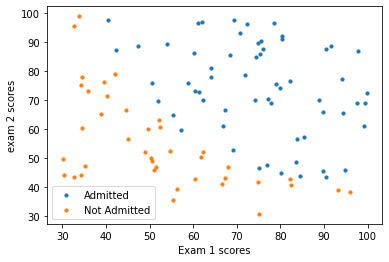

In [366]:
#plot data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

admitted = df.loc[y == 1]
not_admitted = df.loc[y == 0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Exam 1 scores')
plt.ylabel('exam 2 scores')
plt.legend()
plt.show()

In [383]:
#initialize values (theta) and define x 
one = np.ones((100,1))
X_array_one = np.array([df['Exam 1']]).T
X_array_two = np.array([df['Exam 2']]).T

x = np.c_[one,X_array_one,X_array_two]

initial_theta = np.zeros(3)

In [384]:
#sigmoid function

def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    
    return g

sigmoid(0)

0.5

In [385]:
#cost function and gradient at initialized values
def CostFunction(t,x,y):
    
    c= np.dot(x,t)
    h = sigmoid(c)
    m = len(y)
    
    part1 = (-y)*np.log(h)
    part2 = (1-y)*np.log(1-h)
    
    J = -(1/m)*np.sum(part2-part1)
    
    grad = (1/m)*(h-y).T.dot(x)
        
    return J, grad

J, grad = CostFunction(initial_theta,x,y)
print('Cost =',J)
print('Gradient value =',grad)

Cost = 0.6931471805599453
Gradient value = [ -0.1        -12.00921659 -11.26284221]


In [395]:
#Find theta at minimized values
theta,a,b = opt.fmin_tnc(func=CostFunction, x0=initial_theta, args=(x, y))
print('theta =', theta)

theta = [-25.16131881   0.20623159   0.20147149]


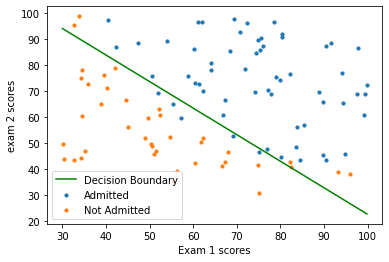

In [396]:
#plot the boundary line
x_opt = np.array([np.min(np.array(x[:,1])), np.max(np.array(x[:,1]))])
y_val = -(theta[0] + theta[1]*x_opt) * (1.0/theta[2])

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.plot(x_opt,y_val,label='Decision Boundary', color ='g')

plt.xlabel('Exam 1 scores')
plt.ylabel('exam 2 scores')

plt.legend()

plt.show()

In [397]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))

In [402]:
def predict(t,x):
    
    p = sigmoid(x.dot(t)) >= 0.5
    
    return p.astype(int)

In [403]:
p = predict(theta, x)
print('Train Accuracy:', np.mean(p == y))

Train Accuracy: 0.89
